In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [20]:
c = cast[(cast.character == "Superman") | (cast.character == "Batman")]
d = c.groupby(['year','character']).size().unstack('character')
len(d[d.Superman > d.Batman])

2

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [23]:
len(d[d.Batman > d.Superman])

6

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

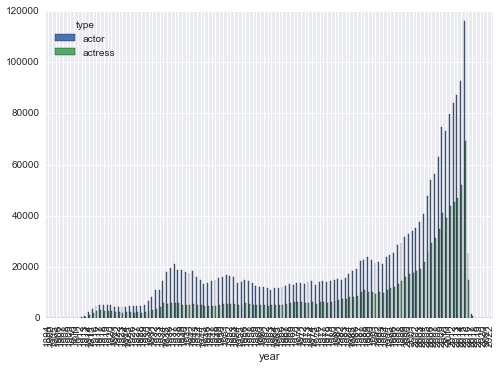

In [6]:
cast.groupby(["year","type"]).size().unstack('type').plot(kind='bar')

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

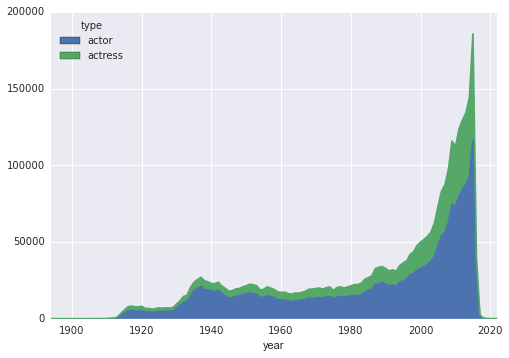

In [19]:
cast.groupby(["year","type"]).size().unstack('type').plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

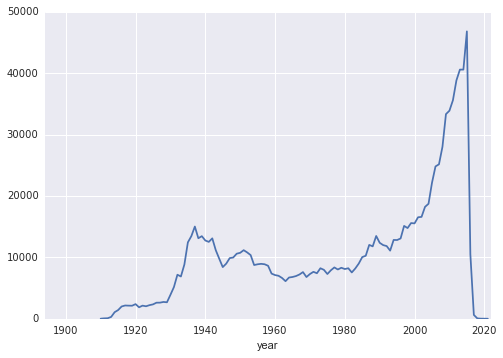

In [23]:
c = cast.groupby(['year','type']).size().unstack("type")
(c.actor-c.actress).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

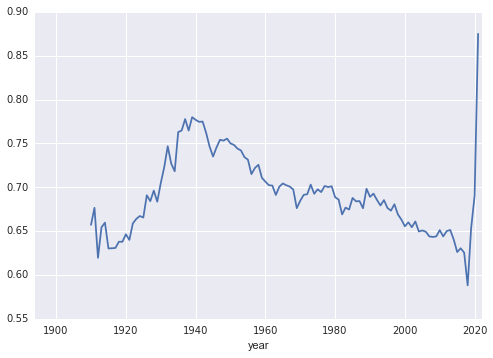

In [25]:
(c.actor / (c.actress+c.actor)).plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [26]:
c = cast[(cast.n == 2)].groupby(["year","type"]).size().unstack("type")

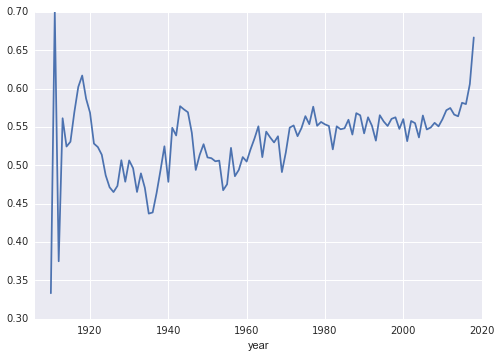

In [27]:
(c.actor / (c.actor + c.actress)).plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

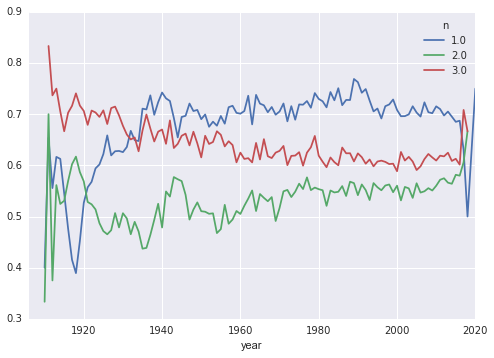

In [33]:
c = cast[cast.n < 4].groupby(["year","type","n"]).size().unstack("type")
d = c.actor / (c.actor + c.actress)
d.unstack("n").plot()